# Special Teams Evaluation - Thesis


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 KB 50.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Summary of data
The 2022 Big Data Bowl data contains Next Gen Stats player tracking, play, game, player, and PFF scouting data for all 2018-2020 Special Teams plays. Here, you'll find a summary of each data set in the 2022 Data Bowl, a list of key variables to join on, and a description of each variable.

### File descriptions
Game data: The `games.csv` contains the teams playing in each game. The key variable is gameId.

Play data: The `plays.csv` file contains play-level information from each game. The key variables are gameId and playId.

Player data: The `players.csv` file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId.

Tracking data: Files `tracking[season].csv` contain player tracking data from season [season]. The key variables are gameId, playId, and nflId.

PFF Scouting data: The `PFFScoutingData.csv` file contains play-level scouting information for each game. The key variables are gameId and playId.


### Game data

- <font color='red'>**``gameId``**</font>: Game identifier, unique (numeric)
- ``season``: Season of game
- ``week``: Week of game
- ``gameDate``: Game Date (time, mm/dd/yyyy)
- ``gameTimeEastern``: Start time of game (time, HH:MM:SS, EST)
- <font color='red'>**``homeTeamAbbr``**</font>: Home team three-letter code (text)
- <font color='red'>**``visitorTeamAbbr``**</font>: Visiting team three-letter code (text)

### Play data
- <font color='red'>**``gameId``**</font>: Game identifier, unique (numeric)
- <font color='red'>**``playId``**</font>: Play identifier, **not unique across games** (numeric)
- <font color='red'>**``playDescription``**</font>: Description of play (text)
- ``quarter``: Game quarter (numeric)
- ``down``: Down (numeric)
- ``yardsToGo``: Distance needed for a first down (numeric)
- <font color="red">**``possessionTeam``**</font>: Team punting, placekicking or kicking off the ball (text)
- <font color="red">**``specialTeamsPlayType``**</font>: Formation of play: Extra Point, Field Goal, Kickoff or Punt (text)
- <font color="red">**``specialTeamsResult``**</font>: Special Teams outcome of play dependent on play type: Blocked Kick Attempt, Blocked Punt, Downed, Fair Catch, Kick Attempt Good, Kick Attempt No Good, Kickoff Team Recovery, Muffed, Non-Special Teams Result, Out of Bounds, Return or Touchback (text)
- ``kickerId``: nflId of placekicker, punter or kickoff specialist on play (numeric)
- ``returnerId``: nflId(s) of returner(s) on play if there was a special teams return. Multiple returners on a play are separated by a ; (text)
- ``kickBlockerId``: nflId of blocker of kick on play if there was a blocked field goal or blocked punt (numeric)
- ``yardlineSide``: 3-letter team code corresponding to line-of-scrimmage (text)
- ``yardlineNumber``: Yard line at line-of-scrimmage (numeric)
- <font color="red">**``gameClock``**</font>: Time on clock of play (MM:SS)
- <font color="red">**``penaltyCodes``**</font>: NFL categorization of the penalties that occurred on the play. A standard penalty code followed by a d means the penalty was on the defense. Multiple penalties on a play are separated by a ; (text)
- ``penaltyJerseyNumber``: Jersey number and team code of the player committing each penalty. Multiple penalties on a play are separated by a ; (text)
- ``penaltyYards``: yards gained by possessionTeam by penalty (numeric)
- ``preSnapHomeScore``: Home score prior to the play (numeric)
- ``preSnapVisitorScore``: Visiting team score prior to the play (numeric)
- <font color="red">**``passResult``**</font>: Scrimmage outcome of the play if specialTeamsPlayResult is "Non-Special Teams Result" (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, ' ': Designed Rush, text)
- <font color="red">**``kickLength``**</font>: Kick length in air of kickoff, field goal or punt (numeric)
- <font color="red">**``kickReturnYardage``**</font>: Yards gained by return team if there was a return on a kickoff or punt (numeric)
- <font color="red">**``playResult``**</font>: Net yards gained by the kicking team, including penalty yardage (numeric)
- <font color="red">**``absoluteYardlineNumber``**</font>: Location of ball downfield in tracking data coordinates (numeric)


### Player data
- <font color = "red">**``nflId``**</font>: Player identification number, unique across players (numeric)
- ``Height``: Player height (text)
- ``Weight``: Player weight (numeric)
- ``birthDate``: Date of birth (YYYY-MM-DD)
- ``collegeName``: Player college (text)
- <font color = "red">**``Position``**</font>: Player position (text)
- ``displayName``: Player name (text)

### Tracking data
Files ``tracking[season].csv`` contains player tracking data from season [season].

- <font color = "red">**``time``**</font>: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)
- <font color = "red">**``x``**</font>: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)
- <font color = "red">**``y``**</font>: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)
- ``s``: Speed in yards/second (numeric)
- ``a``: Acceleration in yards/second^2 (numeric)
- ``dis``: Distance traveled from prior time point, in yards (numeric)
- <font color = "red">**``o``**</font>: Player orientation (deg), 0 - 360 degrees (numeric)
- <font color = "red">**``dir``**</font>: Angle of player motion (deg), 0 - 360 degrees (numeric)
- <font color = "red">**``event``**</font>: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)
- <font color = "red">**``nflId``**</font>: Player identification number, unique across players (numeric)
- ``displayName``: Player name (text)
- ``jerseyNumber``: Jersey number of player (numeric)
- <font color = "red">**``position``**</font>: Player position group (text)
- <font color = "red">**``team``**</font>: Team (away or home) of corresponding player (text)
- <font color = "red">**``frameId``**</font>: Frame identifier for each play, starting at 1 (numeric)
- ``gameId``: Game identifier, unique (numeric)
- ``playId``: Play identifier, not unique across games (numeric)
- <font color = "red">**``playDirection``**</font>: Direction that the offense is moving (left or right)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Problem Statement

An American Football team is composed of a total of 53 players seperated into three units: Offense, Defense and **Special Teams**. Where the latter is is in charge of two important plays:
1. Kick-off: Kick which puts the ball in play at the start of each half and after points are scored (unless its a safety).
2. Punt: Play in which the ball is returned to the other team since the kicking team was unable to advance a minimum of ten yards in three attempts.

Through these plays, special teams focus on obtaining a good field position to generate and advantage for their team.

Keeping this in mind, the general objective is to join Data Science and Artificial Intelligence with American Football and develop a Neural Network Model that is able to compute the optimal path within the dynamic environment of a special teams play. This is will be done with the aid of player tracking data, creation of an intelligent agent and reinforcement learning. This with the purpose of providing special team coaches with insightful information on decision making and how punt/kick-off returners can maximize their team's field position



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Loading the data 

First, lets import all the necessary libraries and modules that'll help the development of the solution. We also indicate each of their funcionalities. 

In [3]:
#For visualization and data manipulation  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython import display
import os 
import random

# Reinforcement Learning
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy 
import heapq

Next we import the seven datasets that correspond to information about game, players, plays and tracking postion for special teams. This data is found in the `nfl-big-data-bowl-2022` folder.

In [4]:
#Define the path for each excel document that contains data 
games_path = '/content/drive/MyDrive/Special-Teams-Evaluation/nfl-big-data-bowl-2022/games.csv'
players_path = '/content/drive/MyDrive/Special-Teams-Evaluation/nfl-big-data-bowl-2022/players.csv'
plays_path = '/content/drive/MyDrive/Special-Teams-Evaluation/nfl-big-data-bowl-2022/plays.csv'
tracking_2018_path  = '/content/drive/MyDrive/Special-Teams-Evaluation/nfl-big-data-bowl-2022/tracking2018.csv'
tracking_2019_path  = '/content/drive/MyDrive/Special-Teams-Evaluation/nfl-big-data-bowl-2022/tracking2019.csv'
tracking_2020_path  = '/content/drive/MyDrive/Special-Teams-Evaluation/nfl-big-data-bowl-2022/tracking2020.csv'

In [5]:
#Import first four datasets
games = pd.read_csv(games_path)
players = pd.read_csv(players_path)
plays = pd.read_csv(plays_path)

In [6]:
#Import tracking datasets (might take a while)
tracking_2018 = pd.read_csv(tracking_2018_path)
tracking_2019 = pd.read_csv(tracking_2019_path)
tracking_2020 = pd.read_csv(tracking_2020_path)

Lets look at each dataframe

In [7]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [8]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,9/6/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,9/9/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,9/9/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,9/9/2018,13:00:00,IND,CIN
4,2018090903,2018,1,9/9/2018,13:00:00,MIA,TEN


In [9]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,1-Jun,208,7/25/1992,James Madison,SS,Dean Marlowe
1,43501,Jun-00,220,8/11/1994,Central Michigan,FS,Kavon Frazier
2,43534,Jun-00,205,6/2/1993,Illinois,SS,Clayton Fejedelem
3,43535,1-Jun,235,12/22/1992,Temple,MLB,Tyler Matakevich
4,44174,1-Jun,236,2/22/1993,Texas Tech,ILB,Sam Eguavoen


In [10]:
tracking_2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [11]:
tracking_2019.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2019-12-29T21:25:27.400,68.39,20.20,0.16,0.31,0.02,320.08,322.40,None,36060.0,Anthony Levine,41.0,DB,home,1,2019122900,36,right
1,2019-12-29T21:25:27.500,68.38,20.21,0.16,0.28,0.02,321.66,309.87,None,36060.0,Anthony Levine,41.0,DB,home,2,2019122900,36,right
2,2019-12-29T21:25:27.600,68.36,20.23,0.20,0.25,0.02,320.67,301.01,None,36060.0,Anthony Levine,41.0,DB,home,3,2019122900,36,right
3,2019-12-29T21:25:27.700,68.34,20.25,0.27,0.20,0.03,303.02,311.86,None,36060.0,Anthony Levine,41.0,DB,home,4,2019122900,36,right
4,2019-12-29T21:25:27.800,68.33,20.26,0.20,0.06,0.01,297.33,308.72,None,36060.0,Anthony Levine,41.0,DB,home,5,2019122900,36,right


In [12]:
tracking_2020.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,40,left
1,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,40,left
2,2021-01-03T18:03:02.400,61.23,46.76,0.10,0.18,0.01,183.38,108.95,None,42901.0,Dean Marlowe,31.0,SS,home,3,2021010300,40,left
3,2021-01-03T18:03:02.500,61.24,46.76,0.11,0.22,0.01,180.24,91.57,None,42901.0,Dean Marlowe,31.0,SS,home,4,2021010300,40,left
4,2021-01-03T18:03:02.600,61.25,46.76,0.05,0.20,0.01,172.44,119.91,None,42901.0,Dean Marlowe,31.0,SS,home,5,2021010300,40,left


### Data Preprocessing



In this following section we will go through each of the loaded Datasets and clean them. This means analyzing which columns are useful and which ones aren't as well as how to deal with `NaN` values. 

#### Game Data

In [13]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,9/6/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,9/9/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,9/9/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,9/9/2018,13:00:00,IND,CIN
4,2018090903,2018,1,9/9/2018,13:00:00,MIA,TEN


From this dataset we can see that there are certain columns which dont contribute to the focus of this thesis. Therefore we drop these columns

In [14]:
# Drop specific columns
games.drop(["week","gameDate","gameTimeEastern"], axis=1, inplace=True)

In [15]:
games.head()

,gameId,season,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,PHI,ATL
1,2018090900,2018,BAL,BUF
2,2018090901,2018,CLE,PIT
3,2018090902,2018,IND,CIN
4,2018090903,2018,MIA,TEN


#### Play Data

In [16]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


The first part of cleaning this dataset is to filter out all the plays that are not Punts nor Field Goals. Lets remember that for the purpose of this thesis, we only focus in punts and Kick-offs. Therefore extra points and field goals are not kept in mind.

Furthermore, we only want to focus on those kicks which are returned. So we also need to filter out results such as `Fair Catch`, `Out of Bounds`, `Touchback` etc.


Having said this lets filter out the dataset:  

In [17]:
print("Shape of the dataframe before filtering:", plays.shape)

Shape of the dataframe before filtering: (19979, 25)


In [18]:
#Filter out only Punts and Kickoffs which are returned
kickoffs_punts = ["Kickoff", "Punt"]
returns = ["Return"]
plays = plays.loc[plays['specialTeamsPlayType'].isin(kickoffs_punts)]
plays = plays.loc[plays['specialTeamsResult'].isin(returns)]

In [19]:
print("Shape of the dataframe after filtering:", plays.shape)

Shape of the dataframe after filtering: (5207, 25)


In [20]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
9,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,...,OH,PHI 29,5.0,3,6,NaN,68.0,13.0,60,45
11,2018090600,1989,"(:44) M.Bosher punts 57 yards to PHI 17, Cente...",2,4,8,ATL,Punt,Return,37267.0,...,UNR,PHI 50,12.0,3,6,NaN,57.0,8.0,61,36
14,2018090600,2599,"(10:22) M.Bosher punts 46 yards to PHI 28, Cen...",3,4,16,ATL,Punt,Return,37267.0,...,NaN,NaN,NaN,3,6,NaN,46.0,9.0,37,36


As we can see, we drastically reduced the observations.




Next we identify the desired columns which we deem useful and drop the rest

In [21]:
plays.drop(['yardsToGo','kickerId', 'returnerId', 'kickBlockerId', 'yardlineSide','yardlineNumber', 'penaltyJerseyNumbers','penaltyYards', 'passResult', 'preSnapHomeScore', 'preSnapVisitorScore'], axis=1, inplace=True)

In [22]:
plays.head()

,gameId,playId,playDescription,quarter,down,possessionTeam,specialTeamsPlayType,specialTeamsResult,gameClock,penaltyCodes,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,PHI,Punt,Return,09:20:00,UNSd,56.0,5.0,36,18
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,ATL,Kickoff,Return,05:01:00,NaN,64.0,30.0,34,75
9,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,ATL,Kickoff,Return,02:08:00,OH,68.0,13.0,60,45
11,2018090600,1989,"(:44) M.Bosher punts 57 yards to PHI 17, Cente...",2,4,ATL,Punt,Return,00:44:00,UNR,57.0,8.0,61,36
14,2018090600,2599,"(10:22) M.Bosher punts 46 yards to PHI 28, Cen...",3,4,ATL,Punt,Return,10:22:00,NaN,46.0,9.0,37,36


Now, we need to keep in mind a very important aspects when working with kick-offs and punts. These are **Penalties**

Penalties can be awarded before, during or after a play. And once the penalty is given, the play doesnt count. With this in mind we want to only retain plays without any penalties. 

Therefore we are going to filter out all the observations with penalties. Once this is done, we are left with a columns of only `NaN` values. Meaning penalty free observations, thus we can eliminate them

In [23]:
# Identify penalties
penalty_values = plays["penaltyCodes"].unique()
index = [1]
penalties = np.delete(penalty_values, index)

# Eliminate observations with penalties
plays = plays[plays.penaltyCodes.isin(penalties) == False]

# # Eliminate columns
plays.drop(["penaltyCodes"], axis=1, inplace=True)

<ipython-input-23-79ed704c88f9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plays.drop(["penaltyCodes"], axis=1, inplace=True)


In [24]:
plays.head()

,gameId,playId,playDescription,quarter,down,possessionTeam,specialTeamsPlayType,specialTeamsResult,gameClock,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,ATL,Kickoff,Return,05:01:00,64.0,30.0,34,75
14,2018090600,2599,"(10:22) M.Bosher punts 46 yards to PHI 28, Cen...",3,4,ATL,Punt,Return,10:22:00,46.0,9.0,37,36
26,2018090900,400,J.Tucker kicks 61 yards from BAL 35 to BUF 4. ...,1,0,BAL,Kickoff,Return,08:42:00,61.0,28.0,33,45
27,2018090900,485,(7:25) (Punt formation) C.Bojorquez punts 46 y...,1,4,BUF,Punt,Return,07:25:00,46.0,-1.0,47,82
28,2018090900,575,(6:37) (Punt formation) S.Koch punts 63 yards ...,1,4,BAL,Punt,Return,06:37:00,63.0,4.0,59,36


Lastly lets check and see if there are any remaining `NaN` values.

In [25]:
plays.columns[plays.isnull().any()]

Index(['kickReturnYardage'], dtype='object')


Lets remember what this column represents:
- ``kickReturnYardage``: Yards gained by return team if there was a return on a kickoff or punt (numeric) 

Therefore we can infer the following about the null values:
- ``kickReturnYardage``: Null values in this case mean that there is no return. We have already eliminated observations that resulted in in fair catches, touchbacks or blocked punts. This means that these observations are those in which the returner fumbles the ball or an onside kick is made. In this case we also eliminate these observations since we want to ensure that the plays in the dataset are those that have a return.

In [26]:
plays.dropna(subset=['kickReturnYardage'], inplace=True)

In [27]:
plays.head()

,gameId,playId,playDescription,quarter,down,possessionTeam,specialTeamsPlayType,specialTeamsResult,gameClock,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,ATL,Kickoff,Return,05:01:00,64.0,30.0,34,75
14,2018090600,2599,"(10:22) M.Bosher punts 46 yards to PHI 28, Cen...",3,4,ATL,Punt,Return,10:22:00,46.0,9.0,37,36
26,2018090900,400,J.Tucker kicks 61 yards from BAL 35 to BUF 4. ...,1,0,BAL,Kickoff,Return,08:42:00,61.0,28.0,33,45
27,2018090900,485,(7:25) (Punt formation) C.Bojorquez punts 46 y...,1,4,BUF,Punt,Return,07:25:00,46.0,-1.0,47,82
28,2018090900,575,(6:37) (Punt formation) S.Koch punts 63 yards ...,1,4,BAL,Punt,Return,06:37:00,63.0,4.0,59,36


Last but not least we need to eliminate the plays that have onside kick. It is important to keep in mind that although rare, there are some instances where onside kicks are returned, but they are few and far between. Therefore, in order to ensure that no kicks where there is no return is used, we will eliminate all of them

By previous examination we obtainted the following list of pairs of `gameId` and `playId` that where onside kicks.

In [28]:
onside_kicks = [(2018090903, 4162), (2018091601, 4214), (2018091700, 4233), (2018092303, 3993), (2018100400, 4630), (2018100706, 3861), (2018100708, 3388), (2018100709, 3866), (2018100710, 4640), (2018101406, 4443), (2018102100, 3461), (2018102101, 4147), (2018102200, 4160), (2018102500, 3136), (2018102805, 4119), (2018102806, 4252), (2018110401, 4373), (2018110405, 3539), (2018110408, 3916), (2018111100, 3841), (2018111110, 3192), (2018111802, 4588), (2018111803, 3993), (2018111805, 3972), (2018112201, 4254), (2018112202, 4080), (2018112501, 4757), (2018120202, 4188), (2018120204, 4105), (2018120210, 4744), (2018120903, 4536), (2018121000, 3920), (2018122306, 4140), (2018122308, 4209), (2018123013, 36), (2019090800, 4512), (2019090802, 3292), (2019090802, 3847), (2019091504, 3954), (2019092206, 3536), (2019100610, 4149), (2019100612, 4473), (2019101305, 4223), (2019101310, 4192), (2019101311, 3498), (2019102001, 4109), (2019102002, 2335), (2019102002, 4765), (2019102700, 3814), (2019110302, 4056), (2019110304, 4382), (2019111702, 2281), (2019112400, 4654), (2019112408, 3699), (2019112411, 4247), (2019112801, 4086), (2019120106, 2243), (2019120106, 4291), (2019120111, 3957), (2019120500, 4801), (2019120800, 3719), (2019120802, 4377), (2019120803, 3768), (2019120805, 4054), (2019121200, 3229), (2019121500, 3721), (2019121507, 3855), (2019121509, 4220), (2019122201, 3707), (2019122901, 4382), (2020091000, 3649), (2020091302, 4574), (2020091310, 4253), (2020091400, 3765), (2020091700, 4638), (2020092003, 3697), (2020092004, 2175), (2020092004, 4266), (2020092008, 3994), (2020092704, 4048), (2020100401, 4415), (2020100402, 4288), (2020100406, 3880), (2020100409, 3742), (2020100412, 4022), (2020101100, 4061), (2020101802, 3709), (2020101803, 3806), (2020101803, 4096), (2020101805, 4535), (2020102509, 3421), (2020110100, 2624), (2020110109, 3822), (2020110109, 4412), (2020110200, 4374), (2020110800, 3988), (2020110800, 4321), (2020110803, 4079), (2020110804, 4196), (2020110806, 4166), (2020111507, 3876), (2020111509, 4198), (2020111512, 3726), (2020112205, 250), (2020112903, 4350), (2020112911, 3867), (2020120607, 4318), (2020120607, 4668), (2020120608, 4566), (2020120700, 4251), (2020120702, 2370), (2020120800, 3611), (2020121305, 4406), (2020121900, 4262), (2020122004, 3506), (2020122013, 4543), (2020122500, 4187), (2020122602, 3928), (2020122710, 4234), (2021010300, 4494), (2021010304, 3985), (2021010315, 4182)]

We remove these from our data set

In [29]:
for i in onside_kicks:
  plays=plays[~((plays['gameId'] == i[0]) & (plays['playId'] == i[1]))]

Therefore, for play data we have managed to do the following:
- Filter out extra points and field goals 
- Eliminate trick plays, plays with penalties, failed punt attempts, onside kicks and plays that were not returned

In [30]:
print("Final shape of the dataframe is:", plays.shape)

Final shape of the dataframe is: (4361, 13)


Lastly we compute pairs for the `playId` and the `gameId` with all information.

In [31]:
pairs = list(zip(plays['gameId'],plays['playId']))

#### Player Data

In [32]:
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,1-Jun,208,7/25/1992,James Madison,SS,Dean Marlowe
1,43501,Jun-00,220,8/11/1994,Central Michigan,FS,Kavon Frazier
2,43534,Jun-00,205,6/2/1993,Illinois,SS,Clayton Fejedelem
3,43535,1-Jun,235,12/22/1992,Temple,MLB,Tyler Matakevich
4,44174,1-Jun,236,2/22/1993,Texas Tech,ILB,Sam Eguavoen


For player data we will only focus on their identification, their position and their name. We shall drop the rest of the columns

In [33]:
players.drop(["height","weight","birthDate","collegeName"], axis=1, inplace=True)

In [34]:
players.head()

,nflId,Position,displayName
0,42901,SS,Dean Marlowe
1,43501,FS,Kavon Frazier
2,43534,SS,Clayton Fejedelem
3,43535,MLB,Tyler Matakevich
4,44174,ILB,Sam Eguavoen


#### Tracking Data

For the tracking data we consider all columns to be relevant in our study of an optimal route when returning a kick. However, since we eliminated certain plays in the play dataset we will further filter the tracking data when simulating the play.

In [35]:
print("Shape of 2018 tracking dataframe before filtering:", tracking_2018.shape)
print("Shape of 2019 tracking dataframe before filtering:", tracking_2019.shape)
print("Shape of 2020 tracking dataframe before filtering:", tracking_2020.shape)

Shape of 2018 tracking dataframe before filtering: (12777351, 18)
Shape of 2019 tracking dataframe before filtering: (12170933, 18)
Shape of 2020 tracking dataframe before filtering: (11821701, 18)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Pitch and Play Animations

We begin by sketching out the pitch. We use the dimensions given in the NFL 2022 Big Data Bowl site in Kaggle to make the visualization as accurate as possible. Therefore we use 120 for the x axis and 53.3 for the y axis. 

In [36]:
def generate_nfl_field():
  #Functionality: generates nfl pitch with accurate dimensions
  #Input: N.A.
  #Output: fig, ax corresponding to an NFL pitch 
    
  #General figure settings
  fig=plt.figure()
  ax=fig.add_subplot(1,1,1)
  fig.set_size_inches(18.5, 10.5)

  #Pitch outline with respect to dimensions given in Kaggle 
  plt.plot([0,0],[0,53.3], color="#50AD80",linewidth=2)
  plt.plot([0,120],[53.3,53.3], color="#50AD80",linewidth=2)
  plt.plot([120,120],[53.3,0], color="#50AD80",linewidth=2)
  plt.plot([120,0],[0,0], color="#50AD80",linewidth=2)

  #Vertical yard lines
  for yard in [10,20,30,40,50,60,70,80,90,100,110]:
      plt.vlines(x=yard, ymin=0, ymax=53.3, color='#202924',linewidth=1)

  #Vertical yard line numbers     
  for x in range(20,110,10):
      num=x
      if x>50:
          num = 120-x
      ax.text(x,5,str(num-10), horizontalalignment='center', fontsize=20, color='white', fontdict={'family': 'serif'})
      ax.text(x-0.35,48.3,str(num-10),horizontalalignment='center',fontsize=20,color='white', rotation = 180, fontdict={'family': 'serif'})

  #Sideline and middle hashmarks 
  for x in range(11,110):
      ax.plot([x,x],[0,0.7], color='#50AD80',linewidth=1)
      ax.plot([x,x],[53.3,52.6], color='#50AD80',linewidth=1)
      ax.plot([x,x],[23.3,24.3], color='#50AD80',linewidth=1)
      ax.plot([x,x],[29,30], color='#50AD80',linewidth=1)
  ax.plot([12,12],[26.3,27], color='white',linewidth=1)
  ax.plot([108,108],[26.3,27], color='white',linewidth=1)


  #Pitch color shading the pitch 
  ax.axvspan(xmin=10, xmax=20, ymin=0.049, ymax=0.955, alpha=0.9, color='#2c3530')
  ax.axvspan(xmin=30, xmax=40, ymin=0.049, ymax=0.955, alpha=0.9, color='#2c3530')
  ax.axvspan(xmin=50, xmax=60, ymin=0.049, ymax=0.955, alpha=0.9, color='#2c3530')
  ax.axvspan(xmin=70, xmax=80, ymin=0.049, ymax=0.955, alpha=0.9, color='#2c3530')
  ax.axvspan(xmin=90, xmax=100, ymin=0.049, ymax=0.955, alpha=0.9, color='#2c3530')
  ax.axvspan(xmin=110, xmax=120, ymin=0.049, ymax=0.955, color='#252e29')

  ax.axvspan(xmin=0, xmax=10, ymin=0.049, ymax=0.955, color='#252e29')
  ax.axvspan(xmin=20, xmax=30, ymin=0.049, ymax=0.955, alpha=0.9, color='#252e29')
  ax.axvspan(xmin=40, xmax=50, ymin=0.049, ymax=0.955, alpha=0.9, color='#252e29')
  ax.axvspan(xmin=60, xmax=70, ymin=0.049, ymax=0.955, alpha=0.9, color='#252e29')
  ax.axvspan(xmin=80, xmax=90, ymin=0.049, ymax=0.955, alpha=0.9, color='#252e29')
  ax.axvspan(xmin=100, xmax=110, ymin=0.049, ymax=0.955, alpha=0.9, color='#252e29')

  plt.axis('off')
  return fig, ax

Lets take a look at our pitch

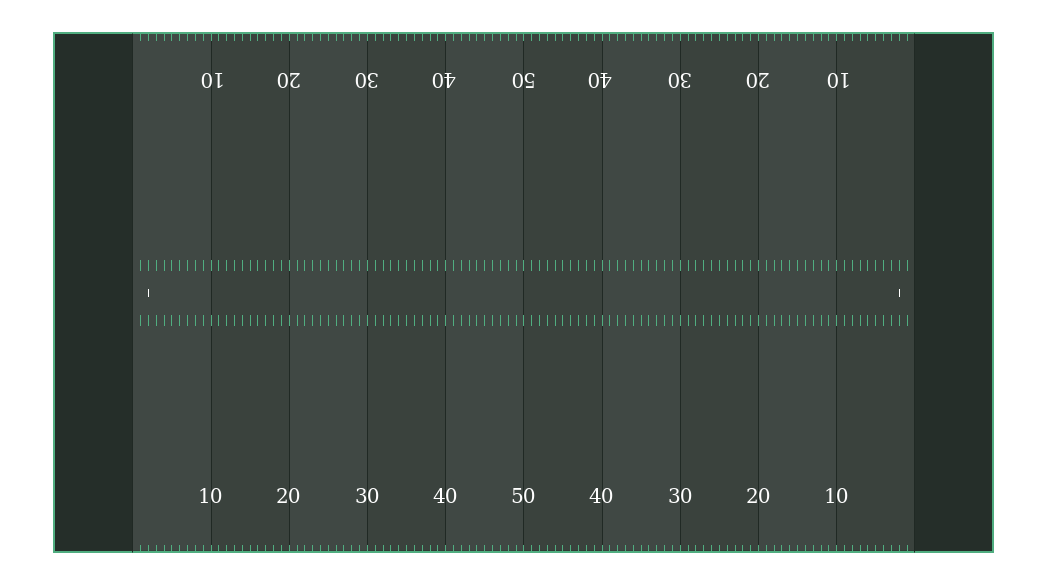

In [37]:
generate_nfl_field()
plt.show()

After creating our football pitch, we need to extract tracking data from the 3 tracking sets. To do so we create the function `tracking_play_book` that allows us to obtain positional information with respect to the teams and the football given the season, ID number of the game and play, as well as the frame.

In [38]:
def tracking_play_book(season, game_id, play_id, frame):
  #Functionality: plots players and football position per frame on the pitch created previosuly 
  #Input: 
    #season: ranges from 2018-2020
    #game id: unique number that represents a specific game
    #play id: unique number that represents a specific play from a game
    #frame: represents snapshot of the play 
  #Output: Will be used in animation

  wanted_plays = ["kick_received", "punt_received"] 

  #Obtains information
  if season == 2018:
    home_team = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["team"]=="home")]
    start_frame = home_team.loc[home_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    home_team = home_team[home_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((home_team["frameId"].max()+1) - home_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    home_team["frameId"] = frame_list
    home_team = home_team[home_team["frameId"] == frame]

    away_team = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["team"]=="away")]
    start_frame = away_team.loc[away_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    away_team = away_team[away_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((away_team["frameId"].max()+1) - away_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    away_team["frameId"] = frame_list
    away_team = away_team[away_team["frameId"] == frame]

    ball = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["team"]=="football")]
    start_frame = ball.loc[ball['event'].isin(wanted_plays)]["frameId"].unique()[0]
    ball = ball[ball["frameId"] >= start_frame]

    frame_list = []
    for i in range((ball["frameId"].max()+1) - ball["frameId"].min()):
      frame_list.append(i)

    ball["frameId"] = frame_list
    ball = ball[ball["frameId"] == frame]

    df = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["frameId"]==start_frame)]
    df.reset_index(inplace=True)

    egg_x = df.iloc[-1]["x"]
    egg_y = df.iloc[-1]["y"]

    ret = df.loc[(df['x'] > egg_x-3) & (df['x'] <egg_x+3) & (df['y'] > egg_y-1.5) & (df['y'] <egg_y+1.5)]
    ret_id = ret.iloc[0]["nflId"]

    if ret_id in home_team["nflId"].values:
      returner = home_team[home_team["nflId"] == ret_id]
    elif ret_id in away_team["nflId"].values:
      returner = away_team[away_team["nflId"] == ret_id]
    else:
      print("Something went wrong")

  elif season == 2019:
    home_team = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["team"]=="home")]
    start_frame = home_team.loc[home_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    home_team = home_team[home_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((home_team["frameId"].max()+1) - home_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    home_team["frameId"] = frame_list
    home_team = home_team[home_team["frameId"] == frame]

    away_team = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["team"]=="away")]
    start_frame = away_team.loc[away_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    away_team = away_team[away_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((away_team["frameId"].max()+1) - away_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    away_team["frameId"] = frame_list
    away_team = away_team[away_team["frameId"] == frame]

    ball = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["team"]=="football")]
    start_frame = ball.loc[ball['event'].isin(wanted_plays)]["frameId"].unique()[0]
    ball = ball[ball["frameId"] >= start_frame]

    frame_list = []
    for i in range((ball["frameId"].max()+1) - ball["frameId"].min()):
      frame_list.append(i)

    ball["frameId"] = frame_list
    ball = ball[ball["frameId"] == frame]

    df = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["frameId"]==start_frame)]
    df.reset_index(inplace=True)

    egg_x = df.iloc[-1]["x"]
    egg_y = df.iloc[-1]["y"]

    ret = df.loc[(df['x'] > egg_x-3) & (df['x'] <egg_x+3) & (df['y'] > egg_y-1.5) & (df['y'] <egg_y+1.5)]
    ret_id = ret.iloc[0]["nflId"]

    if ret_id in home_team["nflId"].values:
      returner = home_team[home_team["nflId"] == ret_id]
    elif ret_id in away_team["nflId"].values:
      returner = away_team[away_team["nflId"] == ret_id]
    else:
      print("Something went wrong")

  elif season == 2020:
    home_team = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["team"]=="home")]
    start_frame = home_team.loc[home_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    home_team = home_team[home_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((home_team["frameId"].max()+1) - home_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    home_team["frameId"] = frame_list
    home_team = home_team[home_team["frameId"] == frame]

    away_team = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["team"]=="away")]
    start_frame = away_team.loc[away_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    away_team = away_team[away_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((away_team["frameId"].max()+1) - away_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    away_team["frameId"] = frame_list
    away_team = away_team[away_team["frameId"] == frame]

    ball = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["team"]=="football")]
    start_frame = ball.loc[ball['event'].isin(wanted_plays)]["frameId"].unique()[0]
    ball = ball[ball["frameId"] >= start_frame]

    frame_list = []
    for i in range((ball["frameId"].max()+1) - ball["frameId"].min()):
      frame_list.append(i)

    ball["frameId"] = frame_list
    ball = ball[ball["frameId"] == frame]

    df = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["frameId"]==start_frame)]
    df.reset_index(inplace=True)

    egg_x = df.iloc[-1]["x"]
    egg_y = df.iloc[-1]["y"]

    ret = df.loc[(df['x'] > egg_x-3) & (df['x'] <egg_x+3) & (df['y'] > egg_y-1.5) & (df['y'] <egg_y+1.5)]
    ret_id = ret.iloc[0]["nflId"]

    if ret_id in home_team["nflId"].values:
      returner = home_team[home_team["nflId"] == ret_id]
    elif ret_id in away_team["nflId"].values:
      returner = away_team[away_team["nflId"] == ret_id]
    else:
      print("Something went wrong")

  #if season value doesnt match, error is raised
  else:
    raise ValueError("Season must have values: 2018, 2019 or 2020")
  
  #data found in the previous code lines is plotted onto the pitch
  home_players.set_data(home_team['x'], home_team['y'])
  away_players.set_data(away_team['x'], away_team['y'])
  kick_returner.set_data(returner['x'], returner['y'])
  football.set_data(ball['x'], ball['y'])

Another important set of information that must be obtained is the number of frames that each play has. To do so we have the following function `total_frames`. This function is able to find the frame number when the kick is fileded in and the number of frames taken for the play to finish.

In [39]:
def total_frames(season, game_id, play_id):
  #Functionality: obtains the total number of frames in a specific play
  #Input:
    #season: ranges from 2018-2020
    #game id: unique number that represents a specific game
    #play id: unique number that represents a specific play from a game
  #Output: total number of frames in play starting from when the kick is fielded 
  
  wanted_plays = ["kick_received", "punt_received"]

  if season == 2018:
    frame_df = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id)]
    start_frame = frame_df.loc[frame_df['event'].isin(wanted_plays)]["frameId"].unique()[0]
    frame_col = frame_df["frameId"]
    return (frame_col.max() - start_frame) + 1 
  elif season == 2019:
    frame_df = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id)]
    start_frame = frame_df.loc[frame_df['event'].isin(wanted_plays)]["frameId"].unique()[0]
    frame_col = frame_df["frameId"]
    return (frame_col.max() - start_frame) + 1
  elif season == 2020:
    frame_df = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id)]
    start_frame = frame_df.loc[frame_df['event'].isin(wanted_plays)]["frameId"].unique()[0]
    frame_col = frame_df["frameId"]
    return (frame_col.max() - start_frame) + 1 
  else:
    raise ValueError("Season must have values: 2018, 2019 or 2020")

We further define the function `return_frame` that returns the number of frames in the play.

In [40]:
def return_frame(season, game_id, play_id):
  if season == 2018:
    df = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id)]
    if "punt_received" in df["event"].unique():
      return df["frameId"].max() - df[df["event"]=="punt_received"]["frameId"].unique()[0] + 1
    elif "kick_received" in df["event"].unique():
      return df["frameId"].max() - df[df["event"]=="kick_received"]["frameId"].unique()[0] + 1
    else: 
      raise ValueError("This play isn't a kick nor a punt return")

  elif season == 2019:
    df = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id)]
    if "punt_received" in df["event"].unique():
      return df["frameId"].max() - df[df["event"]=="punt_received"]["frameId"].unique()[0] + 1
    elif "kick_received" in df["event"].unique():
      return df["frameId"].max() - df[df["event"]=="kick_received"]["frameId"].unique()[0] + 1
    else: 
      raise ValueError("This play isn't a kick nor a punt return")

  elif season == 2020:
    df = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id)]
    if "punt_received" in df["event"].unique():
      return df["frameId"].max() - df[df["event"]=="punt_received"]["frameId"].unique()[0] + 1
    elif "kick_received" in df["event"].unique():
      return df["frameId"].max() - df[df["event"]=="kick_received"]["frameId"].unique()[0] + 1
    else: 
      raise ValueError("This play isn't a kick nor a punt return")

Once we have this information we can animate the play! 

For this we obtain random values for the `gameId` aswell as the `frameId`

In [41]:
random_pair = random.choice(pairs)
random_game = random_pair[0]
random_play = random_pair[1]

if random_game in tracking_2018["gameId"].unique():
  random_season = 2018
elif random_game in tracking_2019["gameId"].unique():
  random_season = 2019
elif random_game in tracking_2020["gameId"].unique():
  random_season = 2020

print("This is game:", random_game)
print("This is play:", random_play)
print("This is season:", random_season)

# ------------------------

season = random_season
game_id = random_game	
play_id = random_play


#set NFL pitch 
fig, ax = generate_nfl_field()

#set color of plot points to differentiate between home team, away team and football 
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
home_players, = ax.plot([], [], ms=12, markerfacecolor='#E01E38',**marker_kwargs)
away_players, = ax.plot([], [], ms=12, markerfacecolor='#EC4B27',**marker_kwargs)
kick_returner, = ax.plot([], [], ms=12, markerfacecolor='cyan',**marker_kwargs)
football, = ax.plot([], [], ms=10, markerfacecolor='#F7A41A',**marker_kwargs)
    
#update formula used in animation
def visualize_play(frame):
  tracking_play_book(season, game_id, play_id,frame)

#With positional data of players and football for every frame, we animate 
animation = FuncAnimation(fig, visualize_play, frames=return_frame(season, game_id, play_id), interval=100) #make the 94 automize
video =animation.to_html5_video() 
html = display.HTML(video) 
display.display(html)
plt.close()

This is game: 2018101411
This is play: 2091
This is season: 2018


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First Approach in Reinforcement Learning

In the following section we are going to create a custom environment using tools derived from `Gym`, an open source library for developing and comparing reinforcement learning algorithms

Right now, our environment is an american football pitch with a single agent, that represents the punt/kick returner. The agents is attacking from right to left, therefore his objective is to reach the left endzone. While trying to reach his goal, the agent will need to avoid opposing players (they are static for now), avoid going out of bounds and scoring a safety (player goes into his own endzone, in this case the right endzone)



Here are some important aspects to keep in mind while designing the custom environment:

- States: Position of the player
- Actions:
  1. Move Forward 
  2. Move Backwards 
  3. Move Left 
  4. Move Right 
  5. Move Forwards and right 
  6. Move Forwards and left 
  7. Move Backwards and right
  8. Move Backwards and left
- Reward: 
  - +4: Awarded if the player scores a touchdown. 
  - +1: Actions taken which lead to the endzone. Thus if the player decides to go forward, forwards right or forwards left.
  - 0: Otherwise. Thus if the player moves left or right 
  - -1: Actions taken that go the opposite way of the endzone. Thus if the player decides to go backwards, backwards right or backwards left 
  - -2: Awarded if the player runs into an opponent 
  - -3: Awarded if the player steps out of bounds
  - -4: Awarded if the player sores a safety.

**<font color = "red"> Important: </font>** To avoid the opponents, the centroid of the regular polygon composed of the N closests opponents was found in order to calculate the distance between it and the returner. We do this to penalize the player if it is too far off from the centroid (point which represents the center of mass of the polygon and where the player should aim to go through) and reward if its close to it.
We define a threshold with value of 1 yard. Meaning that if player is more than 1 yard away from the centroid then it recieves a negative reward and a positive one if its within the threshold.




By default, we have the following values for certain variables. Unless the environment is initiated with different values, these will be used:
- `start_position`: Middle of the field, therefore at point (80, 26.65)
- `time`: 100 seconds
- `yards_step`: every second, the player moves 5 yards 
- `num_of_opponents`: 5 opponents at random positions
- `N` = closest N oponents to the agent. This is calculated with euclidean distance 

In [42]:
game_id = 2018123012
play_id = 2939
season = 2018
tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"] == play_id)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
630016,2018-12-30T23:34:52.400,89.13,32.54,0.26,0.06,0.05,241.71,63.91,line_set,40408.0,LaRoy Reynolds,50.0,MLB,away,1,2018123012,2939,left
630017,2018-12-30T23:34:52.500,89.15,32.54,0.26,0.09,0.03,241.71,67.07,None,40408.0,LaRoy Reynolds,50.0,MLB,away,2,2018123012,2939,left
630018,2018-12-30T23:34:52.600,89.17,32.56,0.23,0.11,0.02,241.71,65.11,None,40408.0,LaRoy Reynolds,50.0,MLB,away,3,2018123012,2939,left
630019,2018-12-30T23:34:52.700,89.19,32.58,0.24,0.13,0.03,232.44,62.27,None,40408.0,LaRoy Reynolds,50.0,MLB,away,4,2018123012,2939,left
630020,2018-12-30T23:34:52.800,89.19,32.56,0.19,0.13,0.01,226.38,66.24,None,40408.0,LaRoy Reynolds,50.0,MLB,away,5,2018123012,2939,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632426,2018-12-30T23:35:02.400,57.58,20.44,1.66,3.37,0.18,NaN,NaN,None,NaN,football,NaN,NaN,football,101,2018123012,2939,left
632427,2018-12-30T23:35:02.500,57.73,20.40,1.41,3.00,0.15,NaN,NaN,None,NaN,football,NaN,NaN,football,102,2018123012,2939,left
632428,2018-12-30T23:35:02.600,57.86,20.38,1.18,2.76,0.13,NaN,NaN,None,NaN,football,NaN,NaN,football,103,2018123012,2939,left
632429,2018-12-30T23:35:02.700,57.97,20.39,0.98,2.51,0.11,NaN,NaN,None,NaN,football,NaN,NaN,football,104,2018123012,2939,left


In [43]:
game_id = 2019101308
play_id = 729
season = 2019
tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"] == play_id)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
8359097,2019-10-13T20:34:34.300,43.93,50.67,0.07,0.36,0.01,58.14,63.98,None,41256.0,Jimmie Ward,20.0,FS,away,1,2019101308,729,right
8359098,2019-10-13T20:34:34.400,43.94,50.68,0.11,0.31,0.01,58.93,60.66,None,41256.0,Jimmie Ward,20.0,FS,away,2,2019101308,729,right
8359099,2019-10-13T20:34:34.500,43.95,50.68,0.13,0.17,0.01,58.93,73.87,None,41256.0,Jimmie Ward,20.0,FS,away,3,2019101308,729,right
8359100,2019-10-13T20:34:34.600,43.96,50.69,0.13,0.13,0.01,58.93,75.78,None,41256.0,Jimmie Ward,20.0,FS,away,4,2019101308,729,right
8359101,2019-10-13T20:34:34.700,43.97,50.69,0.13,0.16,0.01,60.89,89.47,None,41256.0,Jimmie Ward,20.0,FS,away,5,2019101308,729,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361599,2019-10-13T20:34:44.700,83.88,28.48,0.57,1.64,0.07,NaN,NaN,None,NaN,football,NaN,NaN,football,105,2019101308,729,right
8361600,2019-10-13T20:34:44.800,83.88,28.43,0.44,1.21,0.05,NaN,NaN,None,NaN,football,NaN,NaN,football,106,2019101308,729,right
8361601,2019-10-13T20:34:44.900,83.89,28.40,0.31,0.90,0.03,NaN,NaN,None,NaN,football,NaN,NaN,football,107,2019101308,729,right
8361602,2019-10-13T20:34:45.000,83.89,28.40,0.15,0.76,0.01,NaN,NaN,None,NaN,football,NaN,NaN,football,108,2019101308,729,right


Now lets create our environment class

In [44]:
class CustomEnvironment(gym.Env):
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  def __init__(self, start_position = None, opponent_positions = None, blocker_positions = None, time = 100, yards_step = 5, num_of_opponents = 5, N = 3):
    super(CustomEnvironment,self).__init__()

    if start_position is None:
      start_position = np.array([80,26.65])
    self.start_position = np.array(start_position[0])
    # print(self.start_position)

    self.time = time 
    self.yards_step = yards_step
    self.N = N

    #Opponents
    self.block_states = []

    if (opponent_positions is None) and (blocker_positions is None):
      for i in range(21):
        self.block_states.append(np.array([random.randint(10,60),random.randint(7,47)]))
    else:
      self.block_states = opponent_positions + blocker_positions

    # print(self.block_states)
    
    # Dictionary with action association
    self.action_dictionary = {0: "Forward", 1: "Backwards", 2: "Left", 3: "Right", 4: "Forward Left", 5: "Forward Right", 6: "Backwards Left", 7: "Backwards Right"}

    # We have 8 possible actions: F,B,L,R,FL,FR,BL,BR
    num_actions = 8
    self.action_space = gym.spaces.Discrete(num_actions)

    # Our observation space consists of the coordinates of the player 
    self.observation_space = gym.spaces.Box(low = np.array([0,0]), high = np.array([120,53.3]), dtype=np.float64) 
    
    # Current initial state 
    # self.state = np.array(self.start_position)
    self.state = self.start_position
    # print(self.state[0])

    # Length of the play
    self.play_length = time

    # Total reward
    self.total_reward = 0

    # Distance links
    self.distance_links = []

    # Centroid list
    self.centroid = []
    self.threshold = 1

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  def step(self, action):
    done = False
    info = {}
    reward = 0
    #-------------------------------------------------------------------------------
    # Distances
    distances = []
    dicts = {}

    def get_key(val):
      for key, value in dicts.items():
          if (val == value) and (key not in self.keys):
            return key

    for i in range(1):
      for j in range(i, len(self.block_states)):
        distance = ((self.state[0] - self.block_states[j][0])**2 + (self.state[1] - self.block_states[j][1])**2)**0.5
        distances.append(distance)
        dicts[j] = distance

      n_shortest = heapq.nsmallest(self.N, distances)

      self.keys=[]
      for i in n_shortest:
        self.keys.append(get_key(i))

      positions = []
      for i in self.keys:
        self.keys_coords = []
        positions.append(self.block_states[i])
        self.keys_coords.append(self.block_states[i][0])
        self.keys_coords.append(self.block_states[i][1])
        self.distance_links.append(self.keys_coords)
    #-------------------------------------------------------------------------------
    # Centroids
    def Centroid(list_of_points):
      x_cord = sum(list(zip(*list_of_points))[0])
      y_cord = sum(list(zip(*list_of_points))[1])
      centroid = (x_cord/len(list_of_points),y_cord/len(list_of_points))
      return centroid

    self.centroid.append(Centroid(positions))
    distance_cent = ((self.state[0] - Centroid(positions)[0])**2 + (self.state[1] - Centroid(positions)[1])**2)**0.5

    #-------------------------------------------------------------------------------
    # Reduces the play length by 1 second 
    self.play_length -= 1

    # Take into account boundaries of the field
    self.state = np.array([np.clip(self.state[0],0,120), np.clip(self.state[1],0,53.3)])

    #-------------------------------------------------------------------------------
    # Movement (x,y) (Assuming we score the touchdown to the left)
    # And rewards
    # Forwards 
    if action == 0:
      self.state -= (self.yards_step,0)
      self.total_reward += 1
      reward = 1
      if distance_cent > self.threshold:
        self.total_reward -= 0.5
        reward = 0.5
      else:
        pass

    # Backwards
    elif action == 1:
      self.state += (self.yards_step,0)
      self.total_reward -= 1
      reward = -1
    
    # Left
    elif action == 2:
      self.state -= (0,self.yards_step)
      self.total_reward += 0
      reward = 0
   
    # Right    
    elif action == 3:
      self.state += (0,self.yards_step)
      self.total_reward += 0
      reward = 0

    # Forwards Left
    elif action == 4:
      self.state -= (self.yards_step,self.yards_step)
      self.total_reward += 1
      reward = 1
      if distance_cent > self.threshold:
        self.total_reward -= 0.5
        reward = 0.5
      else:
        pass

    # Forwards Right
    elif action == 5:
      self.state += (-(self.yards_step),self.yards_step)
      self.total_reward += 1
      reward = 1
      if distance_cent > self.threshold:
        self.total_reward -= 0.5
        reward = 0.5
      else:
        pass

    # Backwards Left
    elif action == 6:
      self.state += (self.yards_step,-(self.yards_step))
      self.total_reward -= 1
      reward = -1

    # Backwards Right
    elif action == 7:
      self.state += (self.yards_step,self.yards_step)
      self.total_reward -= 1
      reward = -1

    # Rewards taking into account out of bounds and TDs 
    # Touchdown 
    if self.state[0] <= 10:
      self.total_reward += 4
      reward = 4

    # Safety
    elif self.state[0] >= 110:
      self.total_reward -= 4
      reward = -4

    #Out of Bounds
    elif self.state[1] <= 0:
      self.total_reward -= 3
      reward = -3 
    elif self.state[1] >= 53.3:
      self.total_reward -= 3
      reward = -3 

    # Hit an obstacle
    elif any((i == self.state).all() for i in self.block_states):
      self.total_reward -= 2
      reward = -2
    
    #-------------------------------------------------------------------------------
    # Stopping criteria
    # Time expires
    if self.play_length == 0:
      done = True
      positions.append(self.state)
      for i in self.block_states:
        blocker_position.append(i)
      return self.state, reward, done, info 

    # Went out of bounds 
    elif (self.state[1] <= 0):
      done = True 
      self.state[1] = 0
      positions.append(self.state)
      for i in self.block_states:
        blocker_position.append(i)
      return self.state, reward, done, info 
    
    # Went out of bounds
    elif (self.state[1] >= 53.3):
      done = True 
      self.state[1] = 53.3
      positions.append(self.state)
      for i in self.block_states:
        blocker_position.append(i)
 
      return self.state, reward, done, info 

    # Did we reach the end zone 
    elif (self.state[0] <= 10):
      done = True 
      positions.append(self.state)
      for i in self.block_states:
        blocker_position.append(i)
 
      return self.state, reward, done, info 

    # Did we reach our own endzone
    elif (self.state[0] >= 110):
      done = True 
      positions.append(self.state)
      for i in self.block_states:
        blocker_position.append(i)
 
      return self.state, reward, done, info 

    # Did we hit an opponent
    elif any((i == self.state).all() for i in self.block_states):
      done = True 
      positions.append(self.state)
      for i in self.block_states:
        blocker_position.append(i)
 
      return self.state, reward, done, info 
    #-------------------------------------------------------------------------------
    # Optionally Info
    info = {}

    return self.state, reward, done, info 
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  def add_positions(self):
    positions.append(self.state)
    for i in self.block_states:
      blocker_position.append(i)

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  def render_info(self, mode='console'):
    if self.play_length == self.time:
      print(f"Initial time: {self.play_length}\nInitial position: {self.state - (10,0)}")
      print(f"Total reward: ", {self.total_reward})
      print("===========================================================================================================")
    else:
      print(f"Time: {self.play_length}\nAction taken: {self.action_dictionary[action]} \nNew Position: {self.state - (10,0)}\nReward Recieved: {reward}")
      print(f"Total reward: ", {self.total_reward})
      print("===========================================================================================================")

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  def animation(self, episode_list, mode='console'):
    #-------------------------------------------------------------------------------
    # creating the dataframes
    column_values = ['x', 'y']
    returner_df = pd.DataFrame(data = episode_list[0], columns = column_values)
    returner_df['frames'] = returner_df.index

    #-------------------------------------------------------------------------------
    frame_num = []
    k=0
    for i in range(1,len(blocker_episode_list[0])+1):
      frame_num.append(k)
      if i % len(self.block_states) == 0:
        k += 1
    blocker_df = pd.DataFrame(data = blocker_episode_list[0], columns = column_values)
    blocker_df['frames'] = frame_num

    #-------------------------------------------------------------------------------
    frame_num_dist = []
    k_dist=0
    for i in range(1,len(self.distance_links)+1):
      frame_num_dist.append(k_dist)
      if i % self.N == 0:
        k_dist += 1
    distance_df = pd.DataFrame(data=self.distance_links, columns = column_values)
    distance_df['frames'] = frame_num_dist

    #-------------------------------------------------------------------------------
    centroid_df = pd.DataFrame(data = self.centroid, columns = column_values)
    centroid_df['frames'] = centroid_df.index

    #-------------------------------------------------------------------------------
    #set NFL pitch 
    fig, ax = generate_nfl_field()

    #set color of plot points to differentiate between home team, away team and football 
    marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
    returner, = ax.plot([], [], ms=12, markerfacecolor='#E01E38',**marker_kwargs)
    blocker, = ax.plot([], [], ms=12, markerfacecolor='#A209A5',**marker_kwargs)
    centroid, = ax.plot([], [], ms=10, markerfacecolor='#F7A41A',**marker_kwargs)
    distance, = plt.plot([], [], '#EC4B27', animated=True)

    #-------------------------------------------------------------------------------
    #update formula used in animation
    def visualize_play(frame):
      connections = []

      player = returner_df[returner_df["frames"] == frame]
      p1 = player.iloc[0, [0,1]].values.flatten().tolist()
      connections.append(p1)
      obstacle = blocker_df[blocker_df["frames"] == frame]
      center = centroid_df[centroid_df["frames"] == frame]
      distances = distance_df[distance_df["frames"] == frame]
      for i in range(self.N):
        p2 = distances.iloc[i, [0,1]].values.flatten().tolist()
        connections.append(p2)
        connections.append(p1)
      links = list(zip(*connections))
      x = links[0]
      y = links[1]

      returner.set_data(player['x'], player['y'])
      blocker.set_data(obstacle['x'], obstacle['y'])
      centroid.set_data(center['x'], center['y'])
      distance.set_data(x, y)

    #With positional data of players and football for every frame, we animate 
    animation = FuncAnimation(fig, visualize_play, frames=len(returner_df), interval=100)
    video =animation.to_html5_video() 
    html = display.HTML(video) 
    display.display(html)
    plt.close()
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  def reset(self):
    self.state = np.array(self.start_position)
    self.total_reward = 0
    self.play_length = self.time
    self.distance_links = []
    self.centroid = []
    # self.block_states.append(np.array([random.randint(10,60),random.randint(7,47)]))
    return self.state

Now that we have created our custom environment class, lets initialize it. But first, with the sue of the following funciton we are able to obtaine the positions of all players at the time the ball is fielded for any given play.

In [45]:
def initial_condition_playbook(season, game_id, play_id, frame = 0):
  wanted_plays = ["kick_received", "punt_received"] 

  #Obtains information
  if season == 2018:
    home_team = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["team"]=="home")]
    start_frame = home_team.loc[home_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    home_team = home_team[home_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((home_team["frameId"].max()+1) - home_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    home_team["frameId"] = frame_list
    home_team = home_team[home_team["frameId"] == frame]

    away_team = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["team"]=="away")]
    start_frame = away_team.loc[away_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    away_team = away_team[away_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((away_team["frameId"].max()+1) - away_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    away_team["frameId"] = frame_list
    away_team = away_team[away_team["frameId"] == frame]

    ball = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["team"]=="football")]
    start_frame = ball.loc[ball['event'].isin(wanted_plays)]["frameId"].unique()[0]
    ball = ball[ball["frameId"] >= start_frame]

    frame_list = []
    for i in range((ball["frameId"].max()+1) - ball["frameId"].min()):
      frame_list.append(i)

    ball["frameId"] = frame_list
    ball = ball[ball["frameId"] == frame]

    df = tracking_2018[(tracking_2018["gameId"] == game_id) & (tracking_2018["playId"]==play_id) & (tracking_2018["frameId"]==start_frame)]
    df.reset_index(inplace=True)

    egg_x = df.iloc[-1]["x"]
    egg_y = df.iloc[-1]["y"]

    ret = df.loc[(df['x'] > egg_x-3) & (df['x'] <egg_x+3) & (df['y'] > egg_y-1.5) & (df['y'] <egg_y+1.5)]
    ret_id = ret.iloc[0]["nflId"]

    if ret_id in home_team["nflId"].values:
      returner = home_team[home_team["nflId"] == ret_id]
    elif ret_id in away_team["nflId"].values:
      returner = away_team[away_team["nflId"] == ret_id]
    else:
      print("Something went wrong")

  elif season == 2019:
    home_team = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["team"]=="home")]
    start_frame = home_team.loc[home_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    home_team = home_team[home_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((home_team["frameId"].max()+1) - home_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    home_team["frameId"] = frame_list
    home_team = home_team[home_team["frameId"] == frame]

    away_team = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["team"]=="away")]
    start_frame = away_team.loc[away_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    away_team = away_team[away_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((away_team["frameId"].max()+1) - away_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    away_team["frameId"] = frame_list
    away_team = away_team[away_team["frameId"] == frame]

    ball = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["team"]=="football")]
    start_frame = ball.loc[ball['event'].isin(wanted_plays)]["frameId"].unique()[0]
    ball = ball[ball["frameId"] >= start_frame]

    frame_list = []
    for i in range((ball["frameId"].max()+1) - ball["frameId"].min()):
      frame_list.append(i)

    ball["frameId"] = frame_list
    ball = ball[ball["frameId"] == frame]

    df = tracking_2019[(tracking_2019["gameId"] == game_id) & (tracking_2019["playId"]==play_id) & (tracking_2019["frameId"]==start_frame)]
    df.reset_index(inplace=True)

    egg_x = df.iloc[-1]["x"]
    egg_y = df.iloc[-1]["y"]

    ret = df.loc[(df['x'] > egg_x-3) & (df['x'] <egg_x+3) & (df['y'] > egg_y-1.5) & (df['y'] <egg_y+1.5)]
    ret_id = ret.iloc[0]["nflId"]

    if ret_id in home_team["nflId"].values:
      returner = home_team[home_team["nflId"] == ret_id]
    elif ret_id in away_team["nflId"].values:
      returner = away_team[away_team["nflId"] == ret_id]
    else:
      print("Something went wrong")

  elif season == 2020:
    home_team = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["team"]=="home")]
    start_frame = home_team.loc[home_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    home_team = home_team[home_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((home_team["frameId"].max()+1) - home_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    home_team["frameId"] = frame_list
    home_team = home_team[home_team["frameId"] == frame]

    away_team = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["team"]=="away")]
    start_frame = away_team.loc[away_team['event'].isin(wanted_plays)]["frameId"].unique()[0]
    away_team = away_team[away_team["frameId"] >= start_frame]

    frame_list = []
    for i in range((away_team["frameId"].max()+1) - away_team["frameId"].min()):
      frame_list.append(i)

    frame_list = frame_list * 11

    away_team["frameId"] = frame_list
    away_team = away_team[away_team["frameId"] == frame]

    ball = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["team"]=="football")]
    start_frame = ball.loc[ball['event'].isin(wanted_plays)]["frameId"].unique()[0]
    ball = ball[ball["frameId"] >= start_frame]

    frame_list = []
    for i in range((ball["frameId"].max()+1) - ball["frameId"].min()):
      frame_list.append(i)

    ball["frameId"] = frame_list
    ball = ball[ball["frameId"] == frame]

    df = tracking_2020[(tracking_2020["gameId"] == game_id) & (tracking_2020["playId"]==play_id) & (tracking_2020["frameId"]==start_frame)]
    df.reset_index(inplace=True)

    egg_x = df.iloc[-1]["x"]
    egg_y = df.iloc[-1]["y"]

    ret = df.loc[(df['x'] > egg_x-3) & (df['x'] <egg_x+3) & (df['y'] > egg_y-1.5) & (df['y'] <egg_y+1.5)]
    ret_id = ret.iloc[0]["nflId"]

    if ret_id in home_team["nflId"].values:
      returner = home_team[home_team["nflId"] == ret_id]
    elif ret_id in away_team["nflId"].values:
      returner = away_team[away_team["nflId"] == ret_id]
    else:
      print("Something went wrong")
  #if season value doesnt match, error is raised
  else:
    raise ValueError("Season must have values: 2018, 2019 or 2020")
  
  # #set NFL pitch 
  fig, ax = generate_nfl_field()

  #set color of plot points to differentiate between home team, away team and football 
  marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
  home_players, = ax.plot(home_team["x"], home_team["y"], ms=12, markerfacecolor='#E01E38',**marker_kwargs)
  away_players, = ax.plot(away_team["x"], away_team["y"], ms=12, markerfacecolor='#EC4B27',**marker_kwargs)

  home_positions = list(zip(home_team["x"].tolist(),home_team["y"].tolist()))
  away_positions = list(zip(away_team["x"].tolist(),away_team["y"].tolist()))
  returner_position = list(zip(returner["x"].tolist(),returner["y"].tolist()))
  ball_position = list(zip(ball["x"].tolist(),ball["y"].tolist()))

  kick_returner, = ax.plot(returner["x"],returner["y"], ms=12, markerfacecolor='cyan',**marker_kwargs)
  football, = ax.plot(ball["x"], ball["y"], ms=10, markerfacecolor='#F7A41A',**marker_kwargs)

  return home_positions, away_positions, returner_position 

This is game: 2020112202
This is play: 3440
This is season: 2020


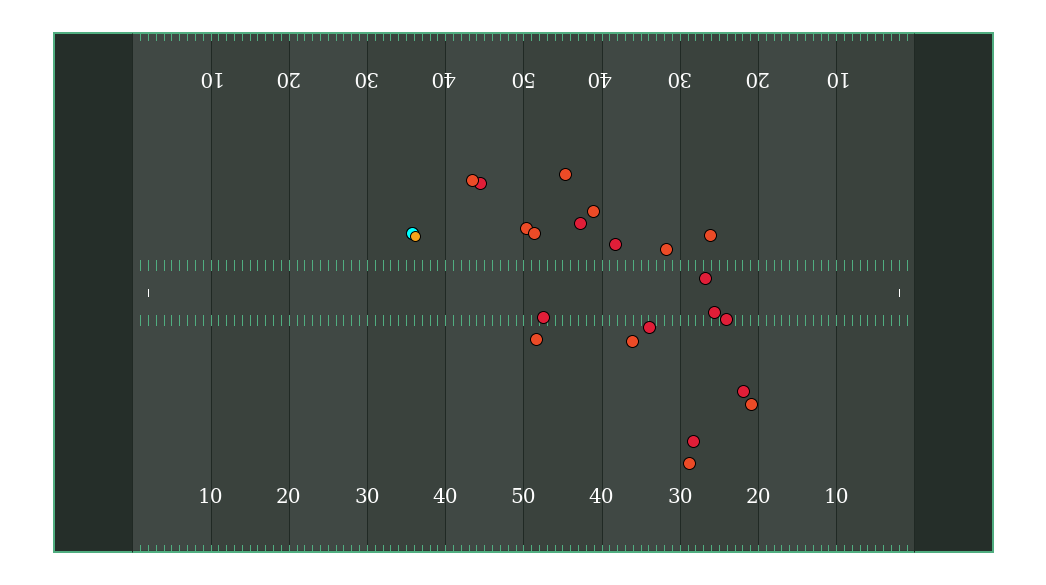

In [46]:
random_pair = random.choice(pairs)
random_game = random_pair[0]
random_play = random_pair[1]

if random_game in tracking_2018["gameId"].unique():
  random_season = 2018
elif random_game in tracking_2019["gameId"].unique():
  random_season = 2019
elif random_game in tracking_2020["gameId"].unique():
  random_season = 2020

print("This is game:", random_game)
print("This is play:", random_play)
print("This is season:", random_season)

# ------------------------

game_id = 2018123012
play_id = 2939
season = 2018

# season = random_season
# game_id = random_game	
# play_id = random_play
frame = 0
home_positions, away_positions, returner_position = initial_condition_playbook(season, game_id, play_id, frame)

start_position = returner_position
opponent_positions = away_positions
blocker_positions = home_positions

time = 200
yards_step = 1
num_of_opponents = 100
N = 3
env = CustomEnvironment(start_position = start_position, opponent_positions = opponent_positions, blocker_positions = blocker_positions, time=time, yards_step=yards_step, num_of_opponents = num_of_opponents, N = N)

Lets look at a random observation and a random action 

In [47]:
print("A random observation:", env.observation_space.sample())
print("A random action:", env.action_space.sample())

A random observation: [47.70229931 15.16332896]
A random action: 6


Now, we are going to test our model with random actions. For each episode we will see the associated score as well as an animation of the path taken by the agent

In [48]:
episodes = 1
episode_list = []
blocker_episode_list = []
for episode in range(1, episodes+1):
  obs = env.reset()
  done = False
  score = 0
  positions = []
  blocker_position = []

  while not done:   
    env.add_positions()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward 
  positions.pop()
  print("Episode:{} Score:{}".format(episode,score))
  episode_list.append(positions)
  blocker_episode_list.append(blocker_position)
  env.animation(episode_list)
  episode_list= []
  blocker_episode_list= []
env.close()

Episode:1 Score:-16.0


Lets create our model based on our environment. This model will use the **Proximal Policy Optimization** algorithm. This combines ideas from A2C (having multiple workers) and TRPO (it uses a trust region to improve the actor)

The main idea is that after an update, the new policy should be not too far from the old policy. For that, ppo uses clipping to avoid too large update.

Furthermore, for the policy we are using 'MlpPolicy', which uses a Multi-Layer Perceptron (MLP) of 2 layers each of 64 nodes



In [49]:
log_path = os.path.join("Training","Logs")
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


We can now train the model. This is done using the function `learn`. We will use 20,000 total timesteps, that is, we train on 20,000 samples (env steps). We also display a progress bar

In [50]:
model.learn(total_timesteps=20000, progress_bar=True)

Logging to Training/Logs/PPO_1


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 98.6     |
|    ep_rew_mean     | -18.8    |
| time/              |          |
|    fps             | 231      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 109         |
|    ep_rew_mean          | -14.5       |
| time/                   |             |
|    fps                  | 351         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017682476 |
|    clip_fraction        | 0.418       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.06       |
|    explained_variance   | -0.0184     |
|    learning_rate        | 0.

We have now successfully trained our model. As we can see from the above results, if we only focus on on `ep_rew_mean`, which is the mean reward per episode, we can see that this value increases over time. 

Meaning that the agent is learning that reaching the endzone gives the most rewards and there takes action which maximize this!

With the use of the function `save`, we save all the attributes of the object and the model parameters within a zip-file.

In [51]:
simple_nfl_model_path = os.path.join("Training", "Saved Models", "Simple_NFL_PPO")

In [52]:
model.save(simple_nfl_model_path)

/usr/local/lib/python3.9/dist-packages/stable_baselines3/common/save_util.py:278: UserWarning: Path 'Training/Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


Following this we are going to delete the model with `del`. This is simply to demonstrate taht we can save and retrieve the model 

In [53]:
del model

Now, we can create a new environment to use our saved model on or we can use the one before (with default settings). In this case we create a new one with custom parameters

In [54]:
# start_position = [100,21]
# time = 5
# yards_step = 0.47
# env = CustomEnvironment(start_position, time, yards_step)

Lets load our model with `load`. This loads the model from the zip-file. 

**<font color = "red"> Warning: </font>** load re-creates the model from scratch, it does not update it in-place! 

In [55]:
model = PPO.load(simple_nfl_model_path, env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Finally we can evaluate the policy. We are going to run the policy for 50 episodes and obtain the average reward. 

In [56]:
evaluate_policy(model, env, n_eval_episodes=50, render=False)

/usr/local/lib/python3.9/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(13.0, 0.0)

We can also now predict with our model. Here we get the policy action from an observation (and optional hidden state). Includes sugar-coating to handle different observations (e.g. normalizing images).

In [57]:
episodes = 1
episode_list = []
blocker_episode_list = []
for episode in range(1, episodes+1):
  obs = env.reset()
  done = False
  score = 0
  positions = []
  blocker_position = []

  while not done:   
    env.add_positions()
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    score += reward 
  positions.pop()
  print("Episode:{} Score:{}".format(episode,score))
  episode_list.append(positions)
  blocker_episode_list.append(blocker_position)
  env.animation(episode_list)
  episode_list= []
  blocker_episode_list= []
env.close()

Episode:1 Score:21.5


As we can see, the agent has learned to reach the end zone given a suitable amount of time and any starting position!

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

https://towardsdatascience.com/openai-gym-from-scratch-619e39af121f


https://developer.nvidia.com/blog/train-reinforcement-learning-agents-openai-gym/

https://openai.com/blog/emergent-tool-use/


https://medium.com/swlh/introduction-to-q-learning-with-openai-gym-2d794da10f3d
